In [1]:
# import stuff

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import tex fonts for nice graphs :)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

In [3]:
# import fitting package scipy

import scipy
from scipy.optimize import curve_fit

In [4]:
# choose how you want to make the plots appear - comment out where relevant. 
## inline is good for notebooks, qt is good for interactive, nbagg is good for interactive in notebooks

%matplotlib inline
# %matplotlib qt
# %matplotlib nbagg

Beam waist for far forward data fit is 4.692mm.
Beam waist for far reverse data fit is 4.241mm.


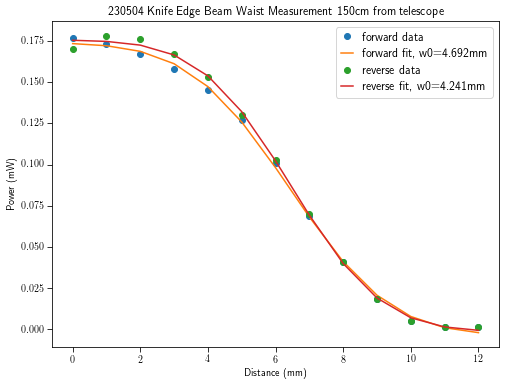

In [11]:
# get data 

## choose however you want to get the data. for me i use excel files so i use pandas to read them in.
## if you have a csv file, use pd.read_csv("filename.csv")
## if you have an excel file, use pd.read_excel("filename.xlsx")
## if you have a text file, use pd.read_table("filename.txt")
## of course, you can use other packages to read in the data, but i find pandas to be the easiest to use.
## directory wise it is advised to save data on shared>data and then read it off there.
df = pd.read_excel("230504KnifeEdgeMeasurement.xlsx")

# get more data

distance_150cm = df.iloc[1:14,0].astype(float)
farpower_150cm_forward_distance = df.iloc[1:14,1].astype(float)
farpower_150cm_reversed_distance = df.iloc[1:14,3].astype(float)

# fit data to error function
# define fitting function
def KnifeEdgeFit(x,a,b,x0,w):
    return b+0.5*a*(1-scipy.special.erf((np.sqrt(2)*(x0-x)/w)))

# Far fit
pOptFarForward, pCovFarForward = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_forward_distance,p0=[0,0,0,5])
pOptFarReverse, pCovFarReverse = curve_fit(KnifeEdgeFit, distance_150cm, farpower_150cm_reversed_distance,p0=[0,0,0,5])
print('Beam waist for far forward data fit is %.3fmm.'%pOptFarForward[3])
print('Beam waist for far reverse data fit is %.3fmm.'%pOptFarReverse[3])

# plot data and fit for far data forward and reverse

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(distance_150cm,farpower_150cm_forward_distance,'o',label='forward data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarForward),'-',label='forward fit, w0=%.3fmm'%pOptFarForward[3])
ax.plot(distance_150cm,farpower_150cm_reversed_distance,'o',label='reverse data')
ax.plot(distance_150cm,KnifeEdgeFit(distance_150cm,*pOptFarReverse),'-',label='reverse fit, w0=%.3fmm'%pOptFarReverse[3])
ax.set_xlabel('Distance (mm)')
ax.set_ylabel('Power (mW)')
ax.legend(loc=0)
ax.set_title('230504 Knife Edge Beam Waist Measurement 150cm from telescope')
# plt.show()

# save image

plt.savefig('230504KnifeEdgeBeamWaist.png',bbox_inches='tight',dpi=300)

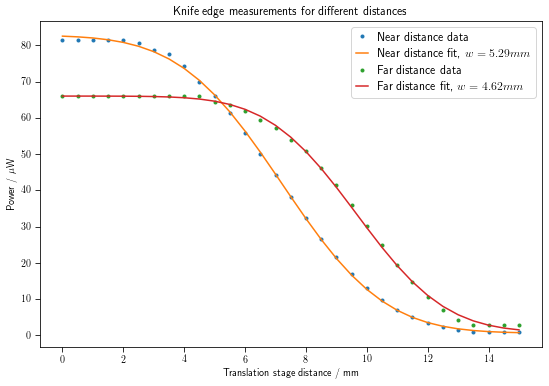

In [273]:
# Combine all plots
plt.figure(figsize=(9,6))
plt.plot(distance[:-10],power_near[:-10],'.',label='Near distance data')
plt.plot(distance[:-10],KnifeEdgeFit(distance,pOptNear[0],pOptNear[1],pOptNear[2],pOptNear[3])[:-10],label=r'Near distance fit, $w=5.29mm$')
plt.plot(distance[:-10],power_far[:-10],'.',label='Far distance data')
plt.plot(distance[:-10],KnifeEdgeFit(distance,pOptFar[0],pOptFar[1],pOptFar[2],pOptFar[3])[:-10],label=r'Far distance fit, $w=4.62mm$')
plt.legend()
plt.xlabel('Translation stage distance / mm')
plt.ylabel(r'Power / $\mu$W')
plt.title('Knife edge measurements for different distances')
# plt.show()
plt.savefig('230302KnifeEdgeBeamWaist.pdf',bbox_inches='tight',dpi=300)